In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
base_obl_people = gpd.read_file('data/base_obl_people.geojson')
data = base_obl_people
data

,id,name,type,gicity,okrug,District,okato,oktmo,geometry
0,230547,243 км,железнодорожный разъезд,Архангельская область,Порожское сельское поселение,Онежский муниципальный район,,,"MULTIPOLYGON (((4282725.010 9309457.333, 42828..."
1,230548,Абрамовская,деревня,Архангельская область,Городское поселение Малошуйское,Онежский муниципальный район,,,"MULTIPOLYGON (((4164870.033 9284514.844, 41648..."
2,230549,Азаполье,деревня,Архангельская область,Целегорское сельское поселение,Мезенский муниципальный район,11242848002,11642448106,"MULTIPOLYGON (((5028684.121 9684115.613, 50281..."
3,230550,Айнова,деревня,Архангельская область,Карпогорское сельское поселение,Пинежский муниципальный район,11248808002,11648408106,"MULTIPOLYGON (((4959351.620 9339491.318, 49594..."
4,230551,Амосово,деревня,Архангельская область,Лисестровское сельское поселение,Приморский муниципальный район,11252836002,11652436106,"MULTIPOLYGON (((4522701.742 9469135.476, 45228..."
...,...,...,...,...,...,...,...,...,...
1225,235245,Янракэннот,село,Чукотский автономный округ,Янракэннот,Городской округ Провидения,77220000006,77710000126,"MULTIPOLYGON (((-19202507.606 9584287.550, -19..."
1226,235246,Янранай,село,Чукотский автономный округ,Янранай,Городской округ Певек,77230000005,77705000126,"MULTIPOLYGON (((18983984.014 11042784.698, 189..."
1227,235249,Яптик-Сале,поселок,Ямало-Ненецкий автономный округ,сельское поселение Мыс-Каменское,Ямальский муниципальный округ,71168000010,71948000146,"MULTIPOLYGON (((8072806.192 10871972.680, 8072..."
1228,235250,Яр-Сале,село,Ямало-Ненецкий автономный округ,сельское поселение Яр-Салинское,Ямальский муниципальный округ,71168000001,71948000101,"MULTIPOLYGON (((7886137.552 10118744.936, 7886..."


In [3]:
print (data.crs.name)
data = data.to_crs('WGS84')
print(data.crs.name)
base_obl_people = data
data.head(3)

WGS 84 / Pseudo-Mercator
WGS 84


,id,name,type,gicity,okrug,District,okato,oktmo,geometry
0,230547,243 км,железнодорожный разъезд,Архангельская область,Порожское сельское поселение,Онежский муниципальный район,,,"MULTIPOLYGON (((38.47237 63.84082, 38.47352 63..."
1,230548,Абрамовская,деревня,Архангельская область,Городское поселение Малошуйское,Онежский муниципальный район,,,"MULTIPOLYGON (((37.41366 63.74187, 37.41388 63..."
2,230549,Азаполье,деревня,Архангельская область,Целегорское сельское поселение,Мезенский муниципальный район,11242848002,11642448106,"MULTIPOLYGON (((45.17344 65.28602, 45.16899 65..."


<AxesSubplot:>

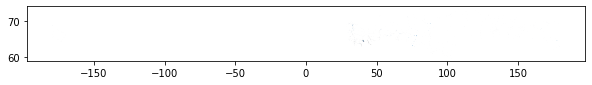

In [4]:
data.plot(figsize=(10,10))

In [5]:
all_res = []

def convert(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        seq = row.geometry.geoms
        polygons = []
        for polygon in seq:
            x, y = polygon.exterior.xy
            pairs = zip(x, y)
            coords = []
            for pair in pairs:
                coords.append([pair[1], pair[0]])
            polygons.append(coords)
        obj = {}
        obj['id'] = objectid
        obj['type'] = row.type
        obj['name'] = row.name
        obj['gicity'] = row.gicity
        obj['okrug'] = row.okrug
        obj['District'] = row.District
        obj['okato'] = row.okato
        obj['oktmo'] = row.oktmo
        obj['geometry'] = polygons

        all_res.append(obj)

data = base_obl_people
objectids = data.id
for objectid in objectids:
    convert(objectid)

base_obl_people_df = pd.DataFrame(all_res)
data = base_obl_people_df
data

,id,type,name,gicity,okrug,District,okato,oktmo,geometry
0,230547,железнодорожный разъезд,0,Архангельская область,Порожское сельское поселение,Онежский муниципальный район,,,"[[[63.84082204305576, 38.47237334523257], [63...."
1,230548,деревня,1,Архангельская область,Городское поселение Малошуйское,Онежский муниципальный район,,,"[[[63.74186701627834, 37.41366407194938], [63...."
2,230549,деревня,2,Архангельская область,Целегорское сельское поселение,Мезенский муниципальный район,11242848002,11642448106,"[[[65.28601513961343, 45.17343804633951], [65...."
3,230550,деревня,3,Архангельская область,Карпогорское сельское поселение,Пинежский муниципальный район,11248808002,11648408106,"[[[63.95951666341896, 44.5506135947908], [63.9..."
4,230551,деревня,4,Архангельская область,Лисестровское сельское поселение,Приморский муниципальный район,11252836002,11652436106,"[[[64.46614200006232, 40.62812099993258], [64...."
...,...,...,...,...,...,...,...,...,...
1225,235245,село,1225,Чукотский автономный округ,Янракэннот,Городской округ Провидения,77220000006,77710000126,"[[[64.90840999206354, -172.49906076160656], [6..."
1226,235246,село,1226,Чукотский автономный округ,Янранай,Городской округ Певек,77230000005,77705000126,"[[[69.92017686048115, 170.53602993167033], [69..."
1227,235249,поселок,1227,Ямало-Ненецкий автономный округ,сельское поселение Мыс-Каменское,Ямальский муниципальный округ,71168000010,71948000146,"[[[69.38668870962151, 72.51925187828647], [69...."
1228,235250,село,1228,Ямало-Ненецкий автономный округ,сельское поселение Яр-Салинское,Ямальский муниципальный округ,71168000001,71948000101,"[[[66.86867553242261, 70.84237895630508], [66...."


In [6]:
data.to_csv('data/base_obl_people_lense.csv', index=False)